
**Business Understanding: It is no secret that Algorithms play a crucial role in modern financial markets. They are used for a wide range of purposes, from executing trades to making investment decisions.**

**Crude oil, often referred to simply as "oil," is a fossil fuel and a natural resource found beneath the Earth's surface.It is a vital energy source and a crucial raw material in various industries. It is commonly processed in refineries to produce various petroleum products, including gasoline, diesel fuel, jet fuel, heating oil, and lubricants. Additionally, crude oil serves as a feedstock for the petrochemical industry, where it is used to produce chemicals and plastics.**

**Objective:In this project we make use of RandomForest Classifier to make a prediction of whether the next week's crude oil's closing price will be higher or lower than the current week.We will deploy a calender based approach for  the model i.e we will train  our model to focus on the 7th, 14th,21st and the 28th day of the month.**

**Goal: Create a model that predicts whether the Closing  price of crude oil in 7 days time will be higher or lower than the Closing price of the current week**



**Importing of necessary libraries**

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from sklearn.model_selection import cross_val_score

Downloading of our Crude Oil data

In [146]:
data= yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [147]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [148]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [149]:
data.dropna

<bound method DataFrame.dropna of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099449   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094261   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087343   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089504   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092099   
...                ...         ...         ...         ...         ...   
2023-08-28  180.089996  180.589996  178.550003  180.190002  180.190002   
2023-08-29  179.699997  184.899994  179.500000  184.119995  184.119995   
2023-08-30  184.940002  187.850006  184.740005  187.649994  187.649994   
2023-08-31  187.839996  189.119995  187.479996  187.869995  187.869995   
2023-09-01  189.485001  189.917496  188.279999  188.460007  188.460007   

   

**Data Visualisation**

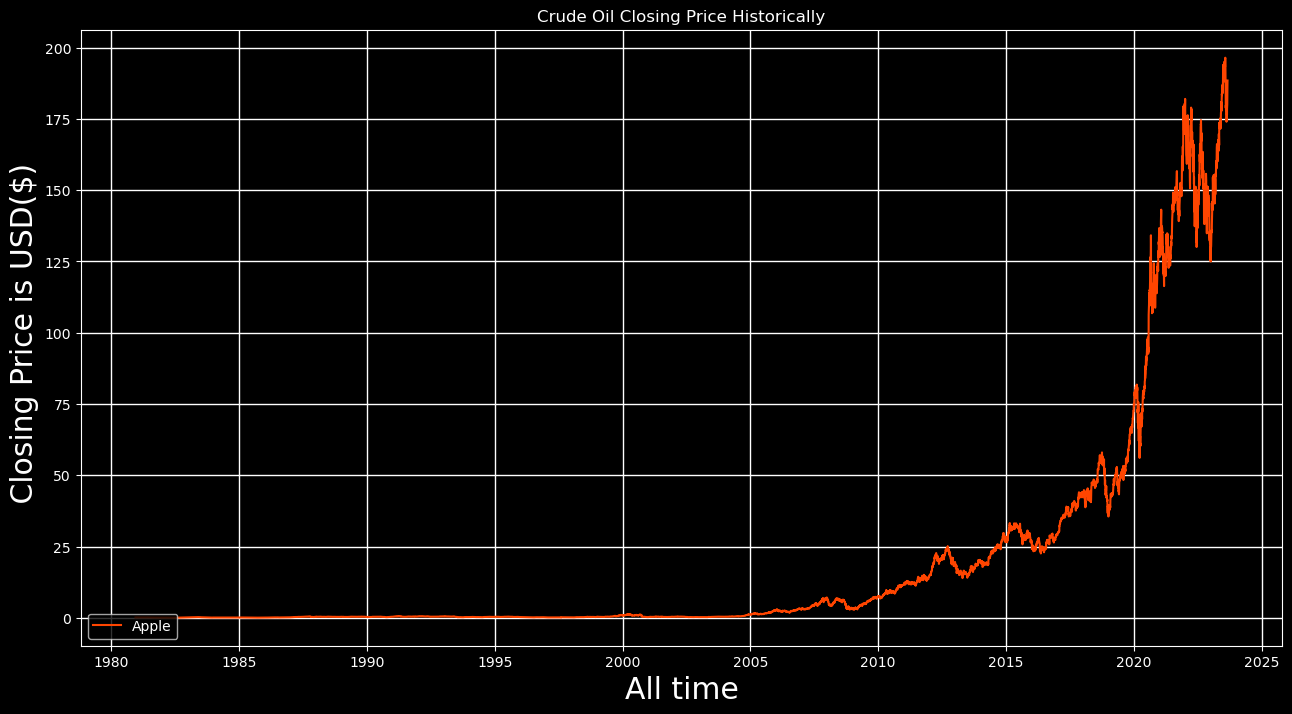

In [150]:
plt.style.use('dark_background')


plt.figure(figsize=(15.5,8))
plt.plot(data['Close'],color='#ff4500', label='Apple')
plt.grid(linewidth='1',color='white')
plt.title('Crude Oil Closing Price Historically')
plt.xlabel("All time",fontsize=21.5)
plt.ylabel(" Closing Price is USD($)",fontsize=21.5)
plt.legend(loc="lower left")
plt.show()

<Axes: >

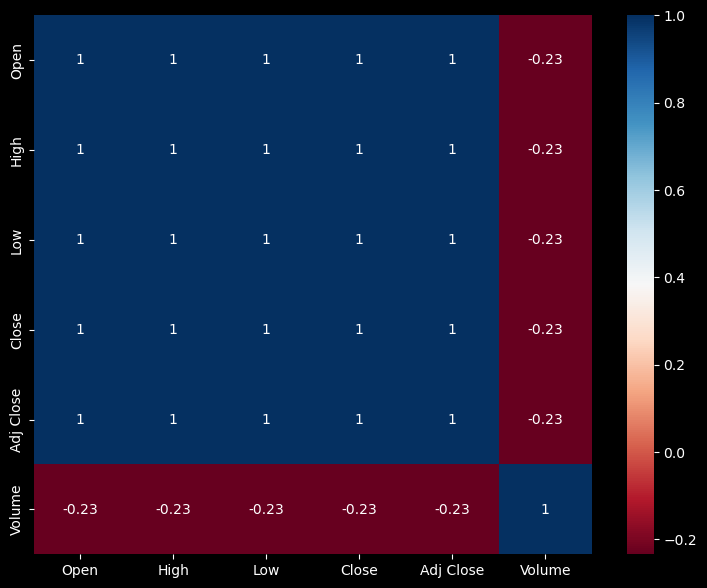

In [151]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(), cmap="RdBu" ,annot=True) 

**All the variables above have Multicollinearity with each other with the exception of volume in relationship to the provided features**

**Lets have a look at the relationship of volume and close**

<Axes: xlabel='Close', ylabel='Volume'>

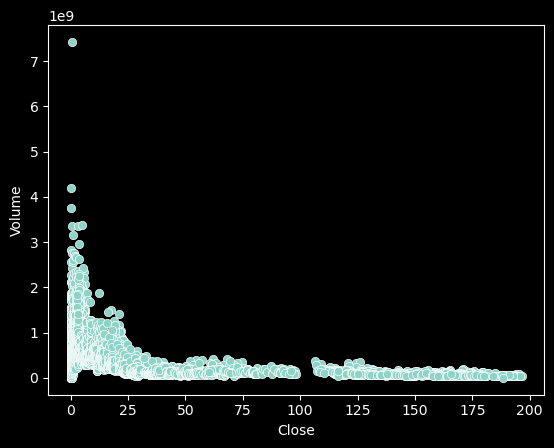

In [152]:
sns.scatterplot(x=data['Close'],y=data['Volume'])

In [153]:
data['Date'] = pd.to_datetime(data.index)

In [154]:
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01'],
              dtype='datetime64[ns]', name='Date', length=10771, freq=None)

In [155]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600,1980-12-12
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,1980-12-15
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,1980-12-16
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,1980-12-17
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,1980-12-18
...,...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700,2023-08-28
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,2023-08-29
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900,2023-08-30


In [156]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600,1980-12-12
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,1980-12-15
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,1980-12-16
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,1980-12-17
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,1980-12-18
...,...,...,...,...,...,...,...
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700,2023-08-28
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,2023-08-29
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900,2023-08-30


**Filtering of the data with the 7th,14th,21st and 28th day of the relevant  month**

In [157]:
screened_df = data[(data['Date'].dt.day == 7) |(data['Date'].dt.day==14 )|(data['Date'].dt.day == 21)|(data['Date'].dt.day==28)]

In [158]:
data.pop('Date')

Date
1980-12-12   1980-12-12
1980-12-15   1980-12-15
1980-12-16   1980-12-16
1980-12-17   1980-12-17
1980-12-18   1980-12-18
                ...    
2023-08-28   2023-08-28
2023-08-29   2023-08-29
2023-08-30   2023-08-30
2023-08-31   2023-08-31
2023-09-01   2023-09-01
Name: Date, Length: 10771, dtype: datetime64[ns]

**Data Visualisation**

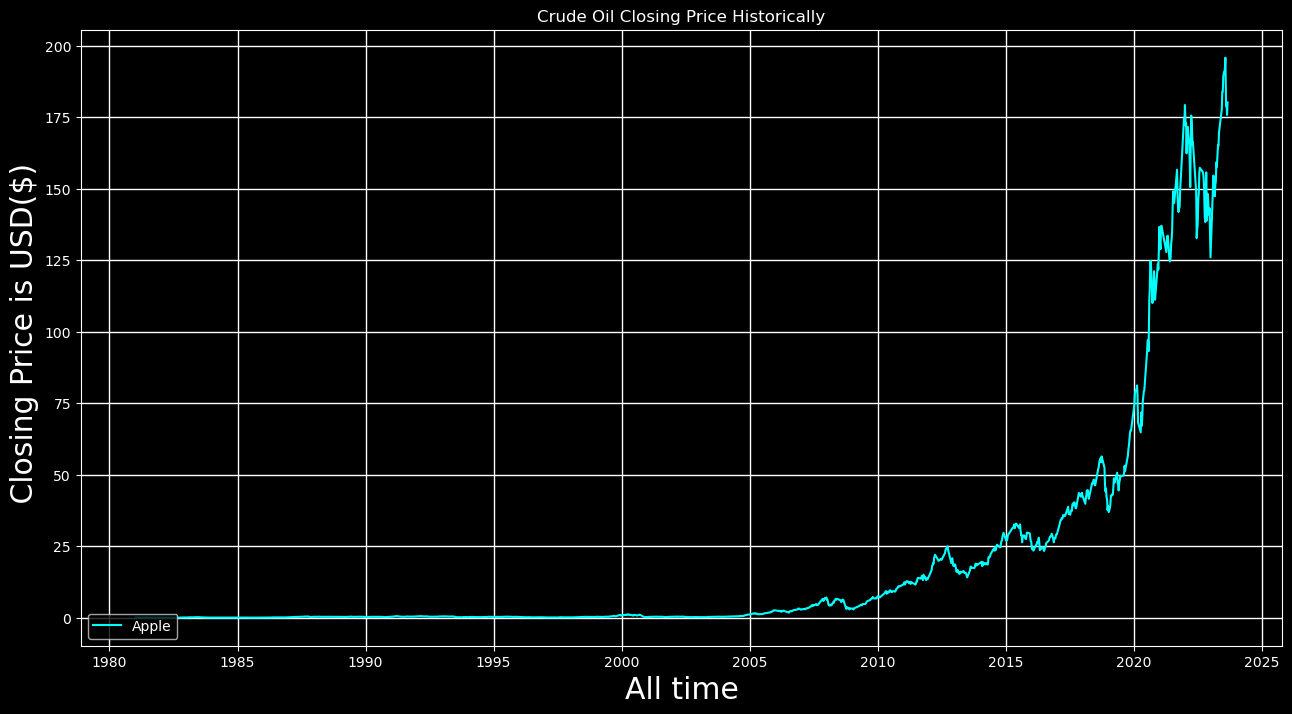

In [159]:
plt.style.use('dark_background')


plt.figure(figsize=(15.5,8))
plt.plot(screened_df['Close'],color='cyan', label='Apple')
plt.grid(linewidth='1',color='white')
plt.title('Crude Oil Closing Price Historically')
plt.xlabel("All time",fontsize=21.5)
plt.ylabel(" Closing Price is USD($)",fontsize=21.5)
plt.legend(loc="lower left")

plt.show()

/tmp/ipykernel_32/1372612913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True)


<Axes: >

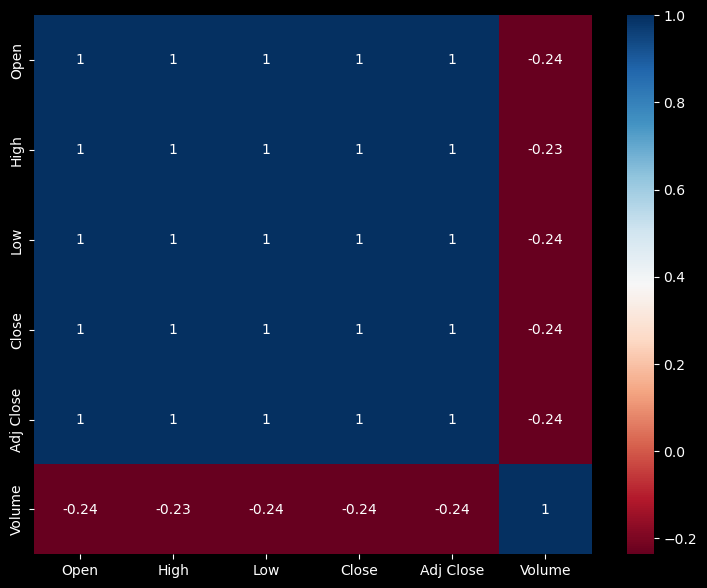

In [160]:
plt.figure(figsize=(9,7))
sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True) 

**Lets have a look at the relationship of volume and close**

<Axes: xlabel='Close', ylabel='Volume'>

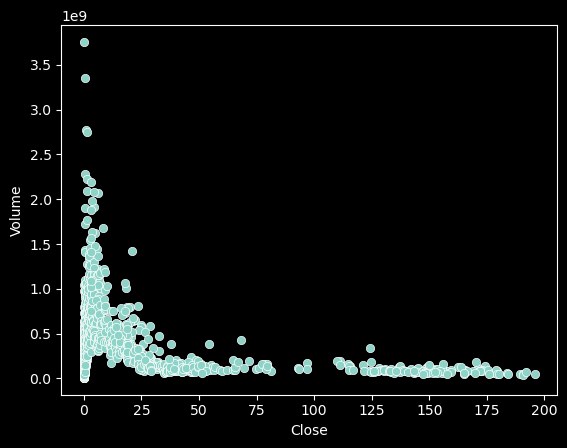

In [161]:
sns.scatterplot(x=screened_df['Close'],y=screened_df['Volume'])

**Feature Engineering**

In [162]:
def create_features(screened_df):
    screened_df=screened_df.copy()
    screened_df['day of week']=screened_df.index.dayofweek
    screened_df['quarter']=screened_df.index.quarter
    screened_df['month']=screened_df.index.month
    screened_df['year']=screened_df.index.year
    screened_df['dayofyear']=screened_df.index.dayofyear
    
    return screened_df

In [163]:
screened_df=create_features(screened_df)

In [164]:
#the price after every 7day period
screened_df["week_time_price"]=screened_df["Close"].shift(-1)


In [165]:
#a standard deviation of the closing price
window = 4  
screened_df['Close_Std_Dev'] = screened_df['Close'].rolling(window=window).std()

In [166]:
screened_df

,Open,High,Low,Close,Adj Close,Volume,Date,day of week,quarter,month,year,dayofyear,week_time_price,Close_Std_Dev
Date,,,,,,,,,,,,,,
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400,1981-01-07,2,1,1,1981,7,0.136719,NaN
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105936,14291200,1981-01-14,2,1,1,1981,14,0.145089,NaN
1981-01-21,0.145089,0.146205,0.145089,0.145089,0.112421,15904000,1981-01-21,2,1,1,1981,21,0.138393,NaN
1981-01-28,0.138951,0.138951,0.138393,0.138393,0.107233,28156800,1981-01-28,2,1,1,1981,28,0.114955,0.003785
1981-04-07,0.115513,0.115513,0.114955,0.114955,0.089072,10684800,1981-04-07,1,2,4,1981,97,0.124442,0.013066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.565918,48291400,2023-07-28,4,3,7,2023,209,178.850006,2.436263
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100,2023-08-07,0,3,8,2023,219,179.460007,7.319881
2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,2023-08-14,0,3,8,2023,226,175.839996,8.654958


**Data visualisation**

/tmp/ipykernel_32/1372612913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True)


<Axes: >

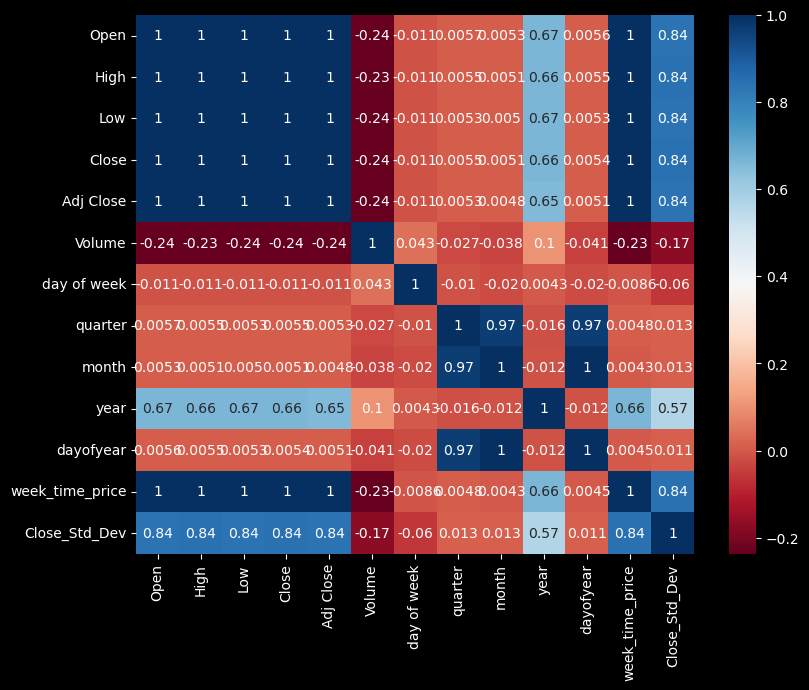

In [167]:
plt.figure(figsize=(9,7))
sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True) 

In [168]:
screened_df["week_time_stance"]=(screened_df["week_time_price"]> screened_df["Close"]).astype(int)

In [169]:
screened_df

,Open,High,Low,Close,Adj Close,Volume,Date,day of week,quarter,month,year,dayofyear,week_time_price,Close_Std_Dev,week_time_stance
Date,,,,,,,,,,,,,,,
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400,1981-01-07,2,1,1,1981,7,0.136719,NaN,0
1981-01-14,0.136719,0.137277,0.136719,0.136719,0.105936,14291200,1981-01-14,2,1,1,1981,14,0.145089,NaN,1
1981-01-21,0.145089,0.146205,0.145089,0.145089,0.112421,15904000,1981-01-21,2,1,1,1981,21,0.138393,NaN,0
1981-01-28,0.138951,0.138951,0.138393,0.138393,0.107233,28156800,1981-01-28,2,1,1,1981,28,0.114955,0.003785,0
1981-04-07,0.115513,0.115513,0.114955,0.114955,0.089072,10684800,1981-04-07,1,2,4,1981,97,0.124442,0.013066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.565918,48291400,2023-07-28,4,3,7,2023,209,178.850006,2.436263,0
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100,2023-08-07,0,3,8,2023,219,179.460007,7.319881,1
2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,2023-08-14,0,3,8,2023,226,175.839996,8.654958,0


In [170]:
screened_df['Close_Std_Dev'].fillna(0, inplace=True)

/tmp/ipykernel_32/1372612913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True)


<Axes: >

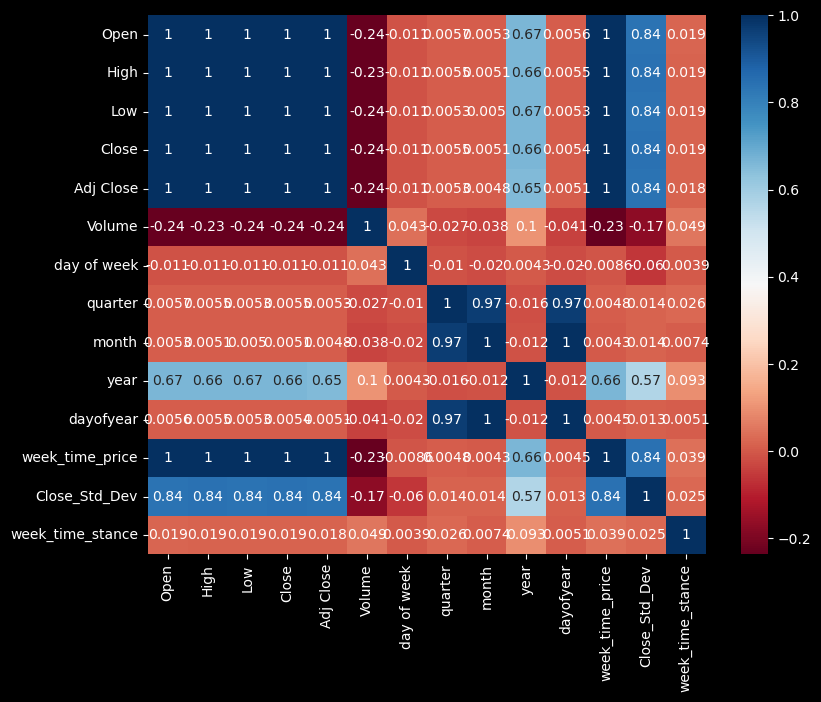

In [171]:
plt.figure(figsize=(9,7))
sns.heatmap(screened_df.corr(), cmap="RdBu" ,annot=True) 

**Train test split**

In [172]:
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Calculate the index to split the data
split_index = int(train_ratio * len(screened_df))

# Split the data into training and testing sets
train_data = screened_df.iloc[:split_index]
test_data = screened_df.iloc[split_index:]

In [173]:

RFC1 = RandomForestClassifier(random_state=1)
predictors1 = ['Open', 'High', 'Low', 'Close','Close_Std_Dev','day of week','quarter','month','year','dayofyear']
RFC1.fit(train_data[predictors1], train_data["week_time_stance"])

RandomForestClassifier(random_state=1)

In [174]:


predictions1= RFC1.predict(test_data[predictors1])
predictions1 = pd.Series(predictions1, index=test_data.index)
precision_score(test_data["week_time_stance"], predictions1)

0.5667870036101083

In [175]:
accuracy_score(test_data["week_time_stance"], predictions1)

0.5664335664335665

In [176]:
precision_scores = cross_val_score(RFC1, test_data[predictors1], test_data["week_time_stance"], cv=5, scoring='precision')


mean_precision_score = precision_scores.mean()
print("Mean Precision Score:", mean_precision_score)


Mean Precision Score: 0.5342915590008613



**Hyperparameter tuning**

In [177]:
RFC2 = RandomForestClassifier(n_estimators=20, min_samples_split=2, random_state=2)
predictors2 = ['Open', 'High', 'Low', 'Close','Close_Std_Dev','day of week','quarter','month','year','dayofyear']
RFC2.fit(train_data[predictors2], train_data["week_time_stance"])

RandomForestClassifier(n_estimators=20, random_state=2)

In [178]:

predictions2= RFC2.predict(test_data[predictors2])
predictions2 = pd.Series(predictions2, index=test_data.index)
precision_score(test_data["week_time_stance"], predictions2)

0.6086956521739131

In [179]:
accuracy_score(test_data["week_time_stance"], predictions2)

0.5944055944055944

In [180]:
precision_scores = cross_val_score(RFC2, test_data[predictors2], test_data["week_time_stance"], cv=5, scoring='precision')


mean_precision_score = precision_scores.mean()
print("Mean Precision Score:", mean_precision_score)

Mean Precision Score: 0.5623186582809224


**The first model(RFC1) has a precision score of 56% and an underwhelming precision score of  53% in cross validation 53% 
The second model(RFC2) a resultant of hyperparameter tuning  has a significantly higher precision score of 60% and a precision score of  56% in cross validation**
**RFC1 is the clearly the better of these two models**


In [181]:
import joblib

model_file_path = 'rfclassifier_time_series1.pkl'

joblib.dump(RFC2, model_file_path)

['rfclassifier_time_series1.pkl']